# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [268]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/matthewwillson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [269]:
 # Read your api key environment variable
# YOUR CODE HERE!
# Load .env enviroment variables
load_dotenv()

True

In [270]:
# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient

newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [271]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!

bitcoin_news = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

In [272]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!

eth_news = newsapi.get_everything(
    q="ethereum",
    language="en"
)

In [273]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939
1,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
2,2021-08-10,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920
3,2021-08-12,"By Joe TidyCyber reporter \r\n""Follow the mone...",-0.8860,0.000,0.271,0.729
4,2021-07-23,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873


In [274]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!

eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925
1,2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939
2,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810
3,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.000,0.861
4,2021-08-05,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.000,1.000


In [275]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.063935,0.048700,0.033200,0.918100
std,0.410191,0.060552,0.066017,0.076228
min,-0.886000,0.000000,0.000000,0.729000
25%,-0.074000,0.000000,0.000000,0.868500
50%,0.000000,0.000000,0.000000,0.918500
75%,0.416125,0.091000,0.064500,1.000000
max,0.690800,0.178000,0.271000,1.000000


In [276]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.119400,0.052350,0.017600,0.930000
std,0.332101,0.064716,0.032365,0.064286
min,-0.440400,0.000000,0.000000,0.810000
25%,0.000000,0.000000,0.000000,0.879000
50%,0.000000,0.024000,0.000000,0.933500
75%,0.345300,0.082500,0.011500,1.000000
max,0.695600,0.190000,0.094000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [277]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [349]:
# Instantiate the lemmatizer
# YOUR CODE HERE!

lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!

sw_list = (stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

extra_list = ["Chars", "data", "another", "photo", "Joe", "reuters", "reutersdado"]

stop_words = sw_list + extra_list

In [350]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""

    # Remove the stop words
    sw = set(stop_words)
    
    # Remove the punctuation from text

    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a tokenized list of the words
    
    words = word_tokenize(re_clean)
    # Lemmatize words into root words

    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [351]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939,"[wife, started, little, garden, urban, backyar..."
1,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822,"[like, dogecoin, devotee, mayor, reno, leader,..."
2,2021-08-10,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920,"[joe, raedlegetty, images, twitter, square, ce..."
3,2021-08-12,"By Joe TidyCyber reporter \r\n""Follow the mone...",-0.8860,0.000,0.271,0.729,"[joe, tidycyber, reporter, follow, money, gene..."
4,2021-07-23,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873,"[get, roundup, techcrunchs, biggest, important..."


In [352]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_df["tokens"] = eth_df.text.apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925,"[many, blockchain, platform, competing, invest..."
1,2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939,"[blockchain, infrastructure, startup, heating,..."
2,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810,"[cent, wa, founded, adfree, creator, network, ..."
3,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.000,0.861,"[bell, today, coinbase, reported, period, impr..."
4,2021-08-05,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.000,1.000,"[representation, ethereum, virtual, currency, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [353]:
from collections import Counter
from nltk import ngrams

In [374]:
bitcoin_string = bitcoin_df.text.str.cat()
bitcoin_token = tokenizer(bitcoin_string)

In [355]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!

bitcoin_bigram_counts = Counter(ngrams(bitcoin_token, n=2))
bitcoin_bigram_counts.most_common(10)

[(('illustration', 'taken'), 6),
 (('bitcoin', 'seen'), 4),
 (('july', 'bitcoin'), 3),
 (('virtual', 'currency'), 3),
 (('currency', 'bitcoin'), 3),
 (('seen', 'front'), 3),
 (('taken', 'june'), 2),
 (('representation', 'virtual'), 2),
 (('front', 'stock'), 2),
 (('stock', 'graph'), 2)]

In [356]:
eth_string = eth_df.text.str.cat()
eth_token = tokenizer(eth_string)

In [357]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_bigram_counts = Counter(ngrams(tokenizer(eth_string), n=2))
eth_bigram_counts.most_common(10)

[(('pc', 'motherboard'), 4),
 (('ethereum', 'placed'), 3),
 (('placed', 'pc'), 3),
 (('motherboard', 'illustration'), 3),
 (('illustration', 'taken'), 3),
 (('taken', 'june'), 3),
 (('ethereum', 'network'), 3),
 (('ruvicillustrationnew', 'york'), 2),
 (('charsrepresentations', 'cryptocurrencies'), 2),
 (('cryptocurrencies', 'bitcoin'), 2)]

In [358]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    
    return Counter(tokens).most_common(N)

In [359]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(bitcoin_token, N=10)

[('bitcoin', 11),
 ('illustration', 6),
 ('taken', 6),
 ('july', 5),
 ('seen', 5),
 ('cryptocurrency', 3),
 ('charsby', 3),
 ('get', 3),
 ('wa', 3),
 ('virtual', 3)]

In [360]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(eth_token, N=10)

[('ethereum', 15),
 ('ha', 6),
 ('network', 5),
 ('ether', 5),
 ('bitcoin', 5),
 ('blockchain', 4),
 ('pc', 4),
 ('motherboard', 4),
 ('illustration', 4),
 ('cryptocurrency', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [361]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

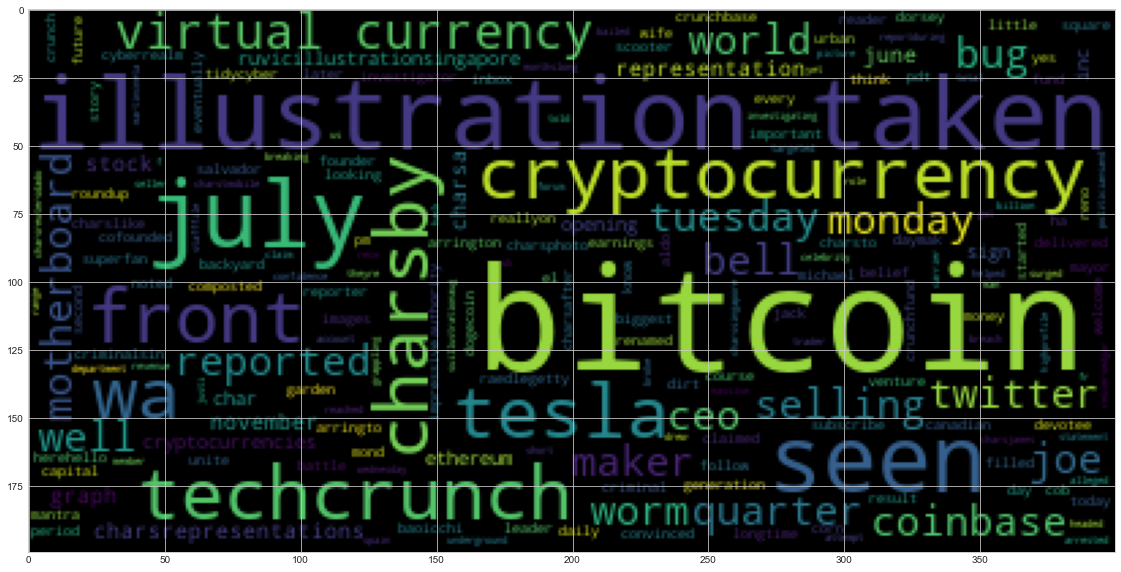

In [362]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
bit_cloud = " ".join(bitcoin_token)
wc = WordCloud().generate(bit_cloud)
plt.imshow(wc)

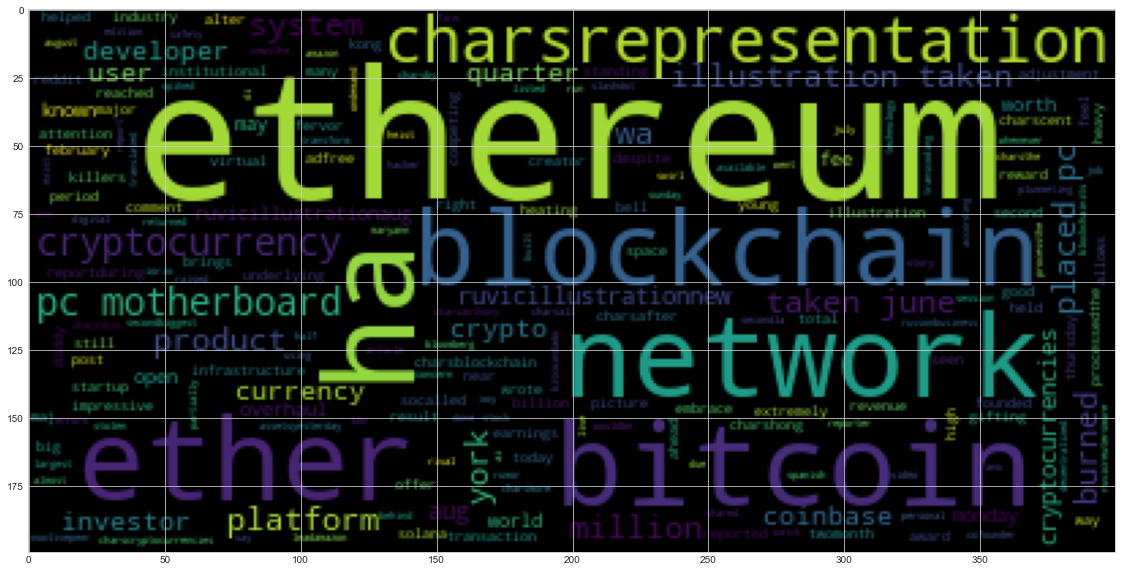

In [363]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_cloud = " ".join(eth_token)
wc = WordCloud().generate(eth_cloud)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [364]:
import spacy
from spacy import displacy

In [365]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [366]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [367]:
# Run the NER processor on all of the text
bitcoin_nlp=nlp(bitcoin_string)

# Add a title to the document
bitcoin_nlp.user_data["title"] = "Bitcoin NER"


# Render the visualization
displacy.render(bitcoin_nlp, style='ent')

In [368]:
# List all Entities
# YOUR CODE HERE!
bitcoin_entities = [ent.text for ent in bitcoin_nlp.ents]
bitcoin_entities

['Reno',
 'El Salvador',
 'Aldo Baoicchi',
 'Canadian',
 'Daymak',
 'Joe Raedle/',
 'Twitter',
 'Square',
 'Jack Dorsey',
 'Monday',
 'Joe',
 'every day',
 '3 p.m. PDT',
 'Daily Crunch',
 'July 23, 2021',
 'Michael Arrington',
 'TechCrunch',
 'Crunchbase',
 'CrunchFund',
 'Tuesday',
 '2017',
 'today',
 'Coinbase',
 'its second quarter',
 'the quarter',
 'Coinbase',
 '$2.23 billion',
 'July 28',
 'Reuters',
 '40,000',
 'Wednesday',
 'Motherboard',
 'June 7, 2021',
 'REUTERS',
 'Edgar Su/IllustrationAug',
 'Reuters',
 '7.07%',
 '47,587.38',
 '2200',
 'Martin/CNET\r\nA',
 'UK',
 'Spain',
 'Twitter',
 '2020',
 'the US Department of Justi',
 'November 19, 2020',
 'REUTERS',
 'Dado Ruvic/IllustrationSINGAPORE',
 'July 21',
 'Reuters',
 'Reuters',
 'FILE',
 'November 19, 2020',
 'REUTERS',
 'Dado Ruvic/Illustration\r\nSINGAPORE',
 '+410',
 'Dado Ruvic/Illustration\r\nWelcome',
 '10',
 'the Opening Bell',
 'first',
 'February 9, 2021',
 'REUTERS',
 'Dado',
 'Reuters',
 'Tesla Inc',
 'July 20',

---

### Ethereum NER

In [369]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_nlp=nlp(eth_string)

In [370]:
# Run the NER processor on all of the text
eth_nlp=nlp(eth_string)

# Add a title to the document
eth_nlp.user_data["title"] = "Ethereum NER"


# Render the visualization
displacy.render(eth_nlp, style='ent')

In [371]:
# List all Entities
# YOUR CODE HERE!
eth_entities = [ent.text for ent in eth_nlp.ents]
eth_entities

['Ethereum',
 'Ethereum Killers',
 'Solana',
 '2017',
 'Reddit',
 'Ethereum',
 'today',
 'Coinbase',
 'its second quarter',
 'the quarter',
 'Coinbase',
 '$2.23 billion',
 'Ethereum',
 'February 3, 2018',
 'REUTERS',
 'Dado Ruvic',
 'Aug 5',
 'Reuters',
 'Aug 5',
 'Reuters',
 'two-month',
 'Thursday',
 'Ethereum',
 'June 29, 2021',
 'REUTERS',
 'Dado Ruvic/IllustrationAug 3',
 'Reuters',
 'Ethereum',
 'Monday',
 'Amazon',
 'Amazon',
 'Mary-Ann RussonBusiness',
 'BBC News',
 'almost half',
 '$600m',
 '433',
 'Yesterday',
 'Ethereum',
 'Bloomberg',
 'Slashdot',
 'Ethereum',
 'June 29, 2021',
 'REUTERS',
 'Dado Ruvic',
 'July 30',
 'Reuters',
 'second',
 'August 5',
 'Sunday',
 'over 45,799',
 'second',
 'Dado Ruvic',
 'Reuters',
 'More than $144 million',
 'Livepeer',
 '$20 million',
 'Ethereum',
 'Spanish',
 'AI',
 'Xoy Capital',
 'Guadalajara',
 'Jalisco',
 'Xoycoin',
 'Ethereum',
 'Monday',
 'Chicago Bulls',
 'American Express',
 'Ethereum',
 'June 29, 2021',
 'REUTERS',
 'Dado Ruvic/

---